# pyCUBs: Codon Usage Bias，CUB base on python

## List of features that have been developed and are planned to be developed

[Done] Observed number of occurrences of codon (Obs) analysis


[Done] Stat frequency of cusp software. cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp


[Done] Relative synonymous codon usage (RSCU) analysis


[Done] Draw codon barplot


[Done] Parity rule 2 (PR2) analysis


[Done] Draw Neutrality curve


[Done] Draw ENC plot


[Done] Cups sortware anslysis


[Done part] codonW sortware anslysis


[Plan] CAI analysis


[Plan] Codon Bias Index (CBI)


[Plan] Frequency of OPtimal codons


[Plan] Corresponding analysis (COA)


## Dependencies and test environment

scipy >= v1.11.4


numpy >= v1.26.3


seaborn >= v0.13.1


matplotlib >= v3.8.2


python >= v3.11.5

## test data

Min.mt.fasta data from https://plantscience.cn/cn/article/doi/10.11913/PSJ.2095-0837.2022.20229

In [13]:
import sys
sys.path.append('/mnt/nfs1/jupyter/pyCUBs/pyCUBs/') # import library path
import pycubcore

# Switch the test work path and import test data
import os
os.chdir('/mnt/nfs1/jupyter/pyCUBs/')
inputfile = "./test_data/Min.mt.fasta"

# Module Introduction
"""
├── codontables.py  # Codon table module
├── fastaio.py      # Fasta IO module
└── pycubcore.py    # CUB Core computing module
"""

import codontables
print("\nTable of available genetic codons:\n",codontables.CodonTables())
import fastaio
help(fastaio.FastaIO)

# Some information about the library
print(pycubcore.__author__)
print("pycubcore function: ", pycubcore.__all__)
print("version: ",pycubcore.__version__)


Table of available genetic codons:
 Reference website: https://www.ncbi.nlm.nih.gov/Taxonomy/taxonomyhome.html/index.cgi?chapter=tgencodes

Translate Tables/Genetic Codes:
 1: Standard
 2: Vertebrate Mitochondrial
 3: YeastMitochondrial
 4: Mold Mitochondrial, Protozoan Mitochondrial, Coelenterate Mitochondrial, Mycoplasma, Spiroplasma
 5: Invertebrate Mitochondrial
 6: Ciliate Nuclear, Dasycladacean Nuclear, Hexamita Nuclear
 9: Echinoderm Mitochondrial, Flatworm Mitochondrial
10: Euplotid Nuclear
11: Bacterial, Archaeal, Plant Plastid
12: Alternative Yeast Nuclear
13: Ascidian Mitochondrial
14: Alternative Flatworm Mitochondrial
16: Chlorophycean Mitochondrial
21: Trematode Mitochondrial
22: Scenedesmus obliquus Mitochondrial
23: Thraustochytrium Mitochondrial
24: Rhabdopleuridae Mitochondrial
25: Candidate Division SR1, Gracilibacteria
26: Pachysolen tannophilus Nuclear
27: Karyorelict Nuclear
28: Condylostoma Nuclear
29: Mesodinium Nuclear
30: Peritrich Nuclear
31: Blastocrithidia

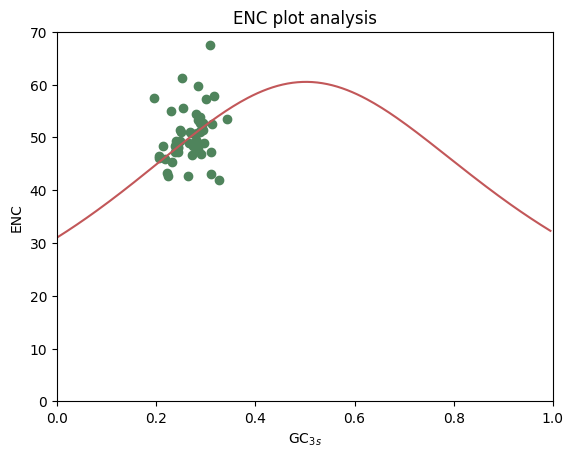

In [22]:
## example1: Effective number of codons (ENC) analysis
#help(pycubcore.ENC)
ENCResult = pycubcore.ENC(inputfile, genetic_codes=16) #Genetic_Codes=16, Selected genetic codon table 16 Plant chloroplasts
#help(pycubcore.DrawENC)
pycubcore.DrawENC(ENCResult, show_gene_name=False)

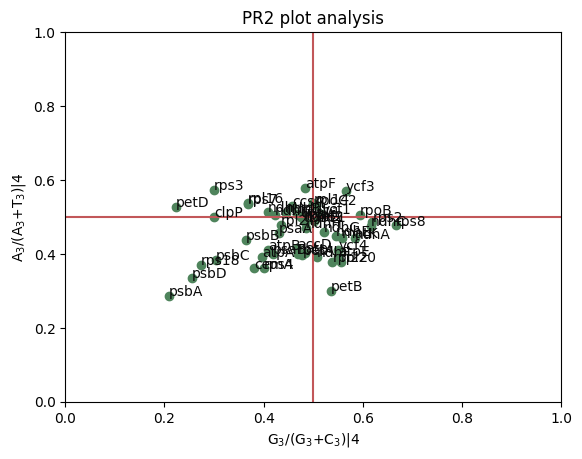

In [24]:
# example2: Parity rule 2 (PR2) analysis.
# help(pycubcore.PR2)
PR2Result = pycubcore.PR2(inputfile, genetic_codes=16)
# help(pycubcore.DrawPR2)
pycubcore.DrawPR2(PR2Result, show_gene_name=True) #Show gene name

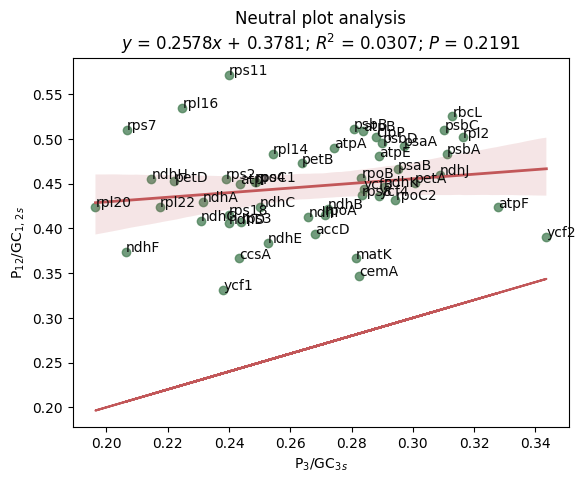

In [23]:
# example3: Neutral plot analysis.
NPAResult = pycubcore.NPA(inputfile, genetic_codes=16)
pycubcore.DrawNPA(NPAResult, show_gene_name=True)

input seqence:

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCTT

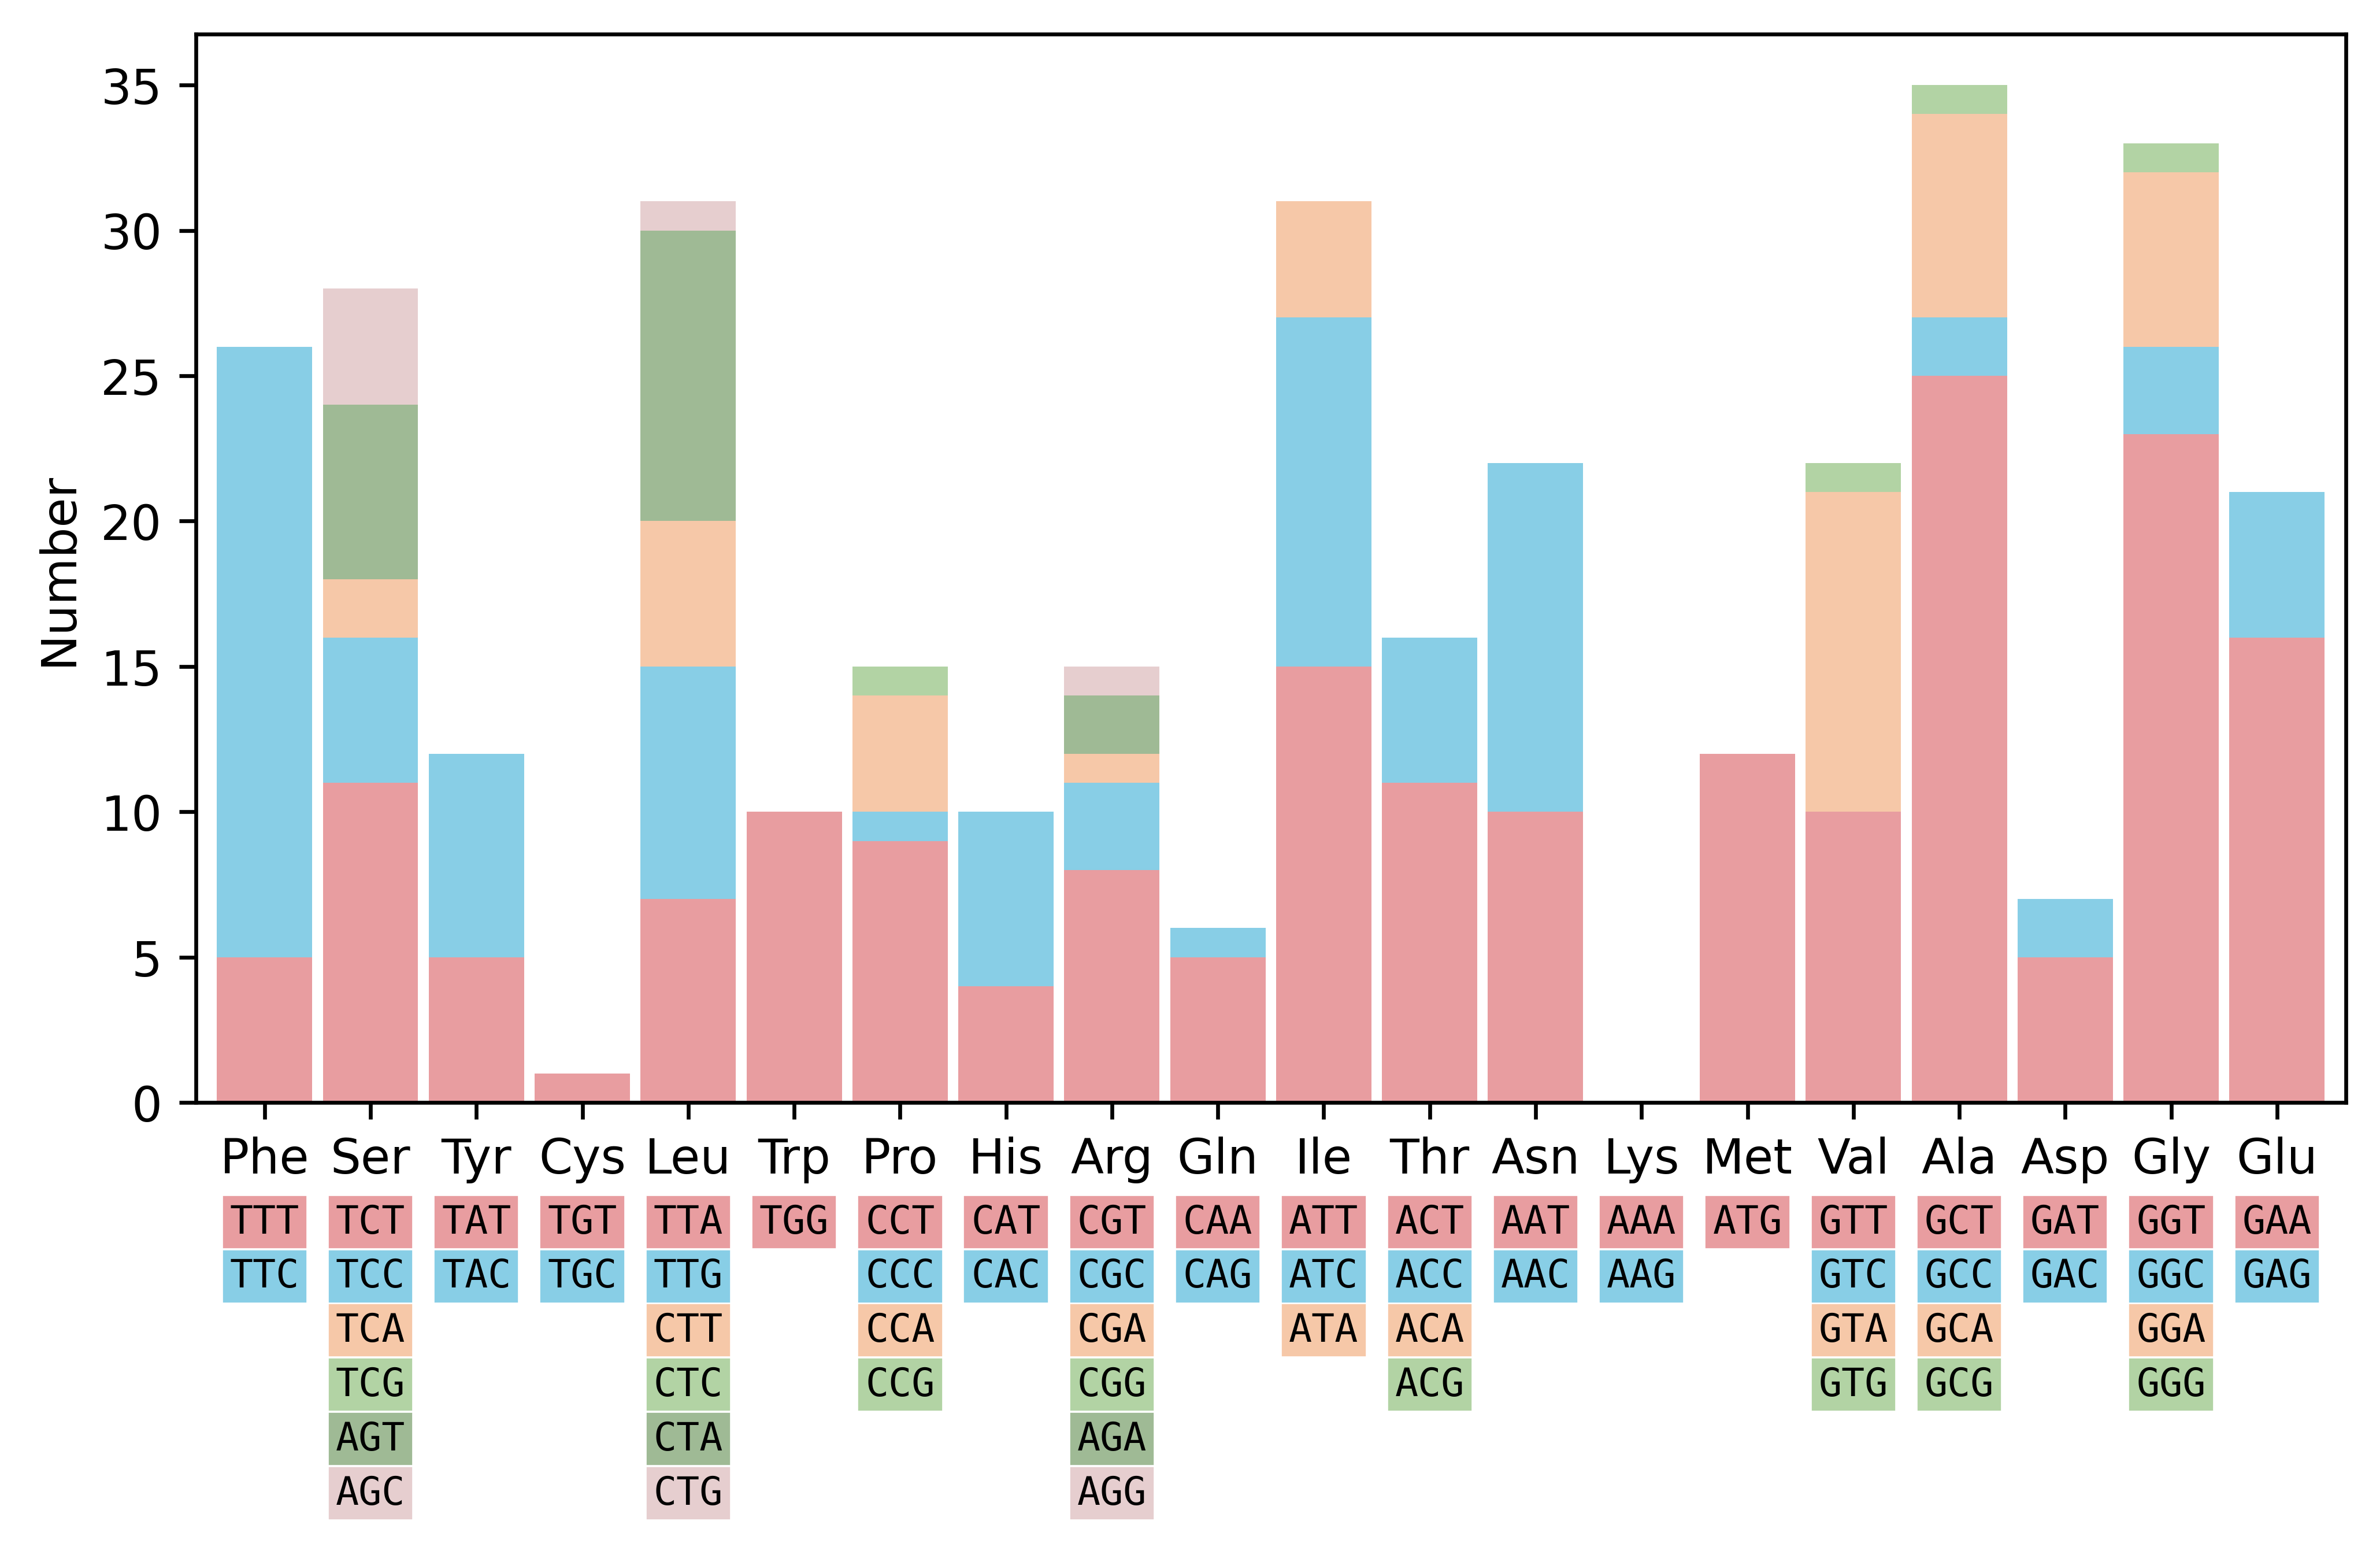

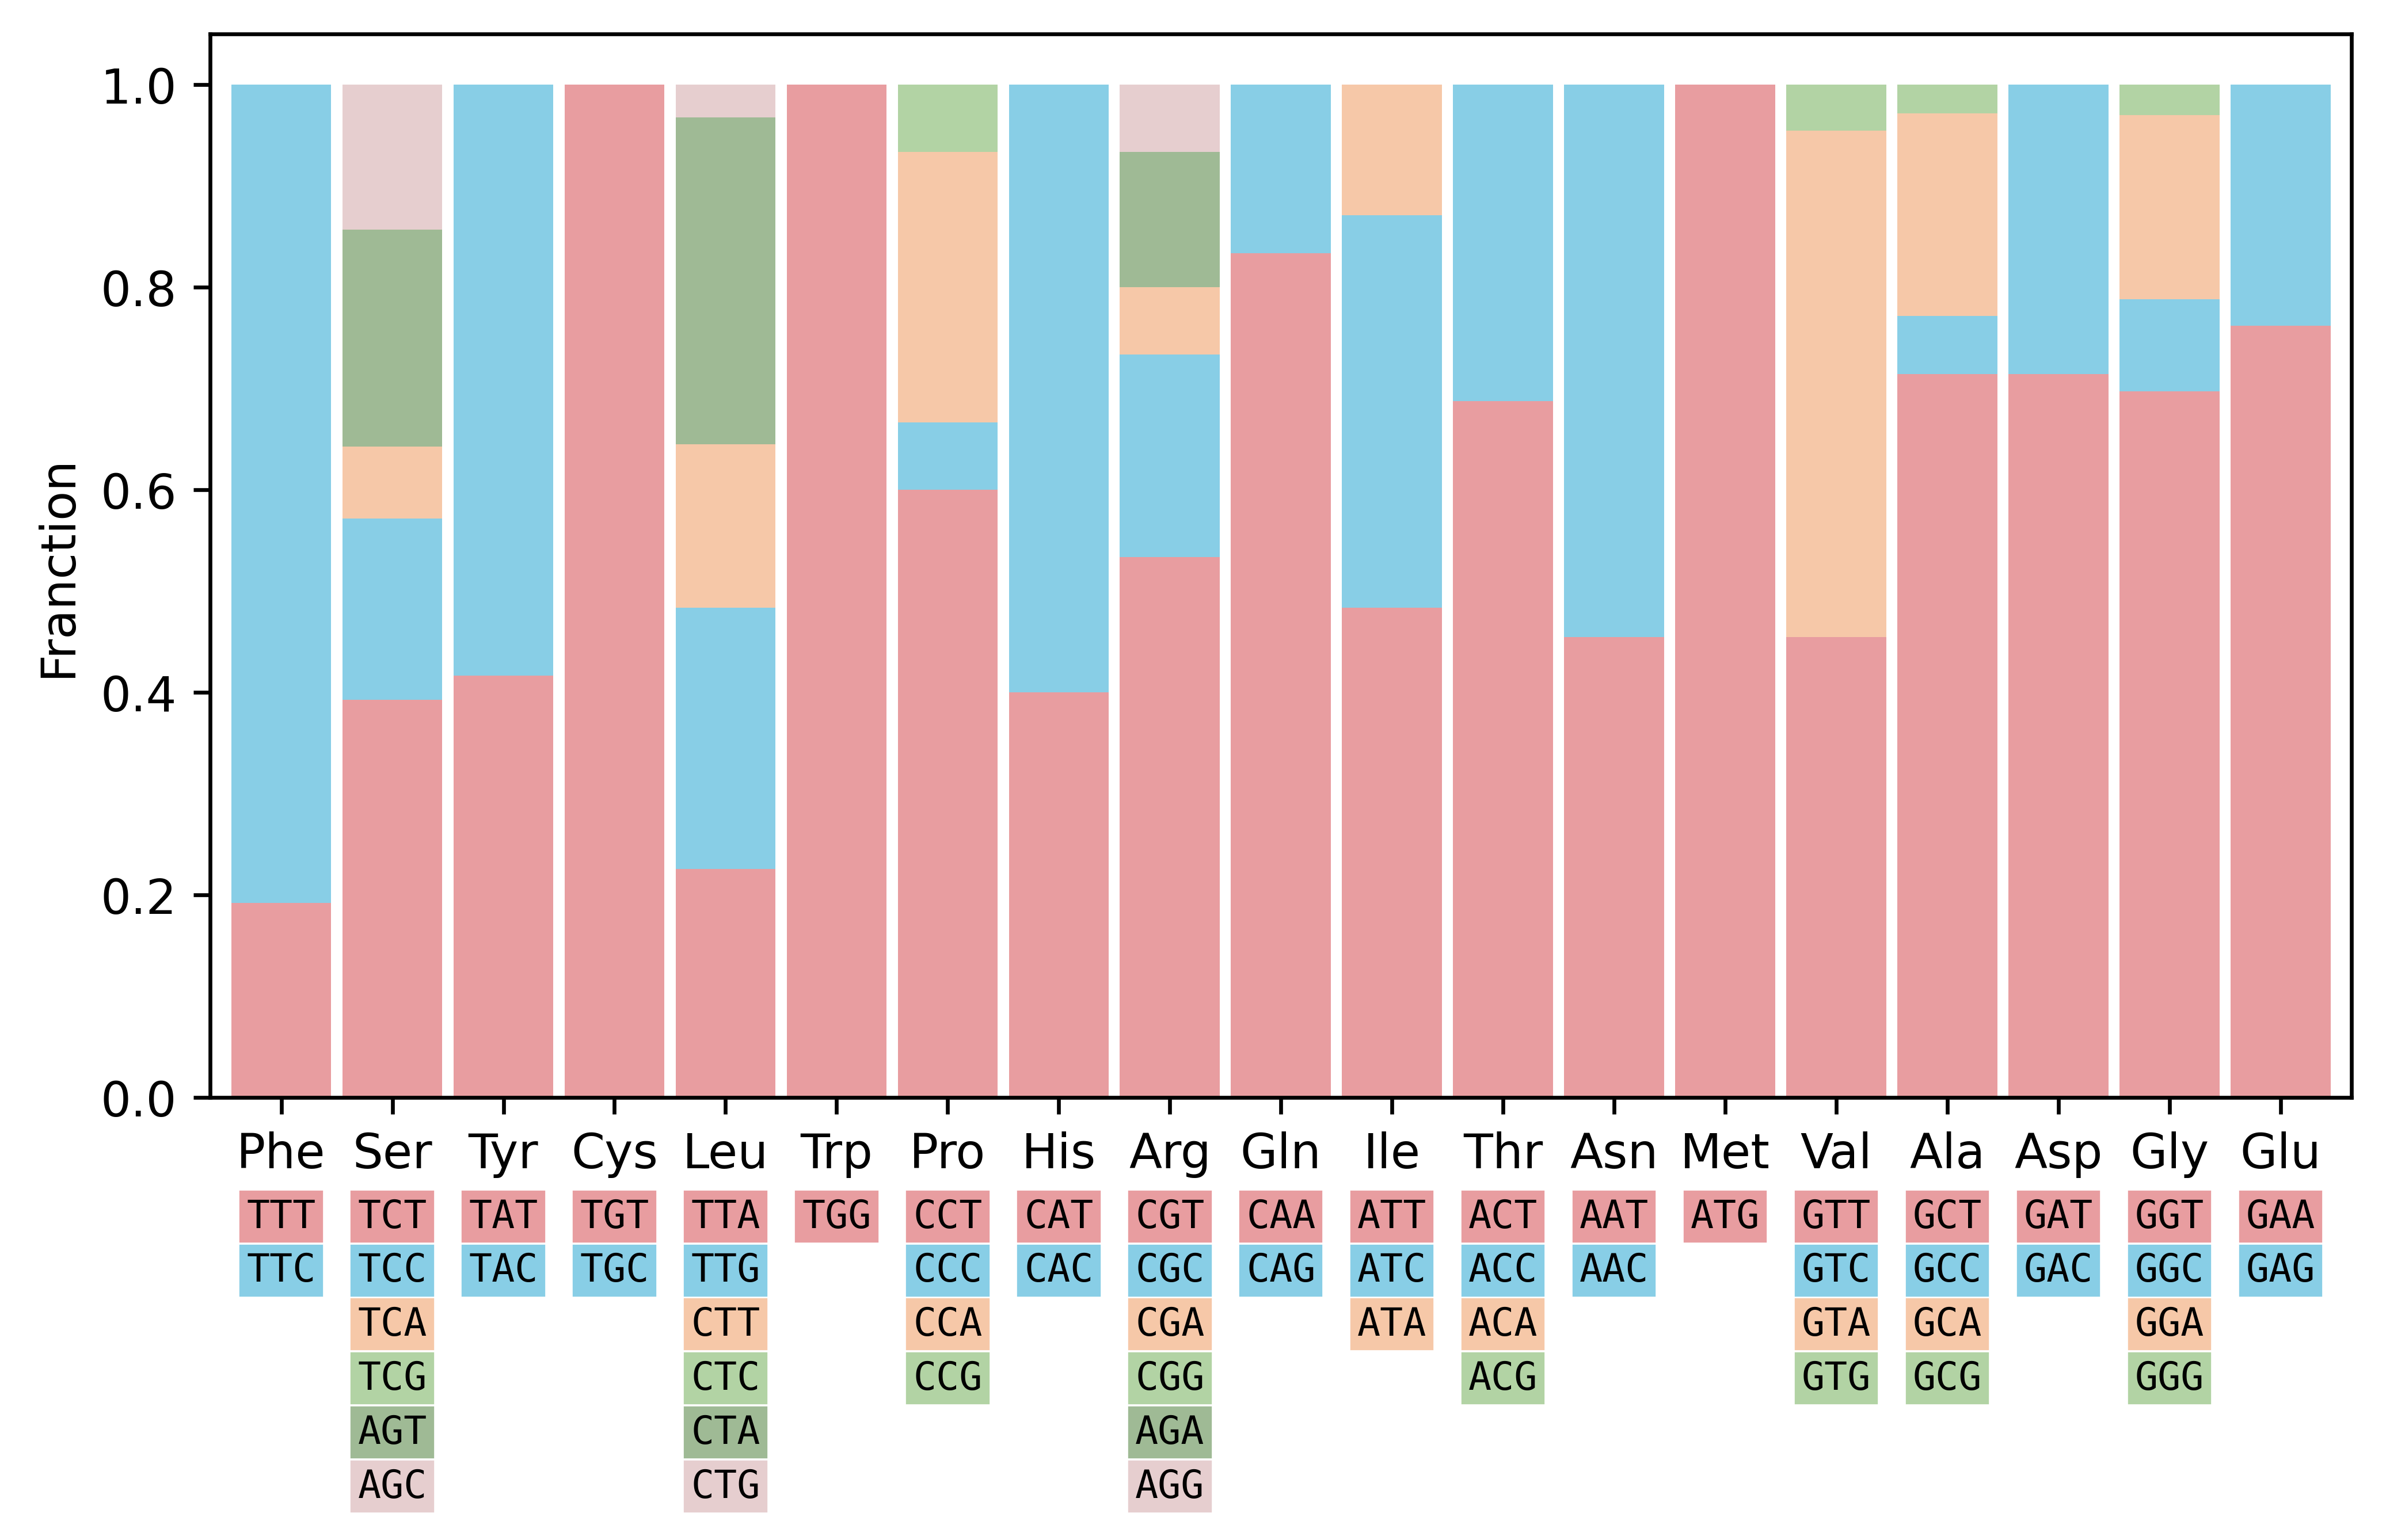

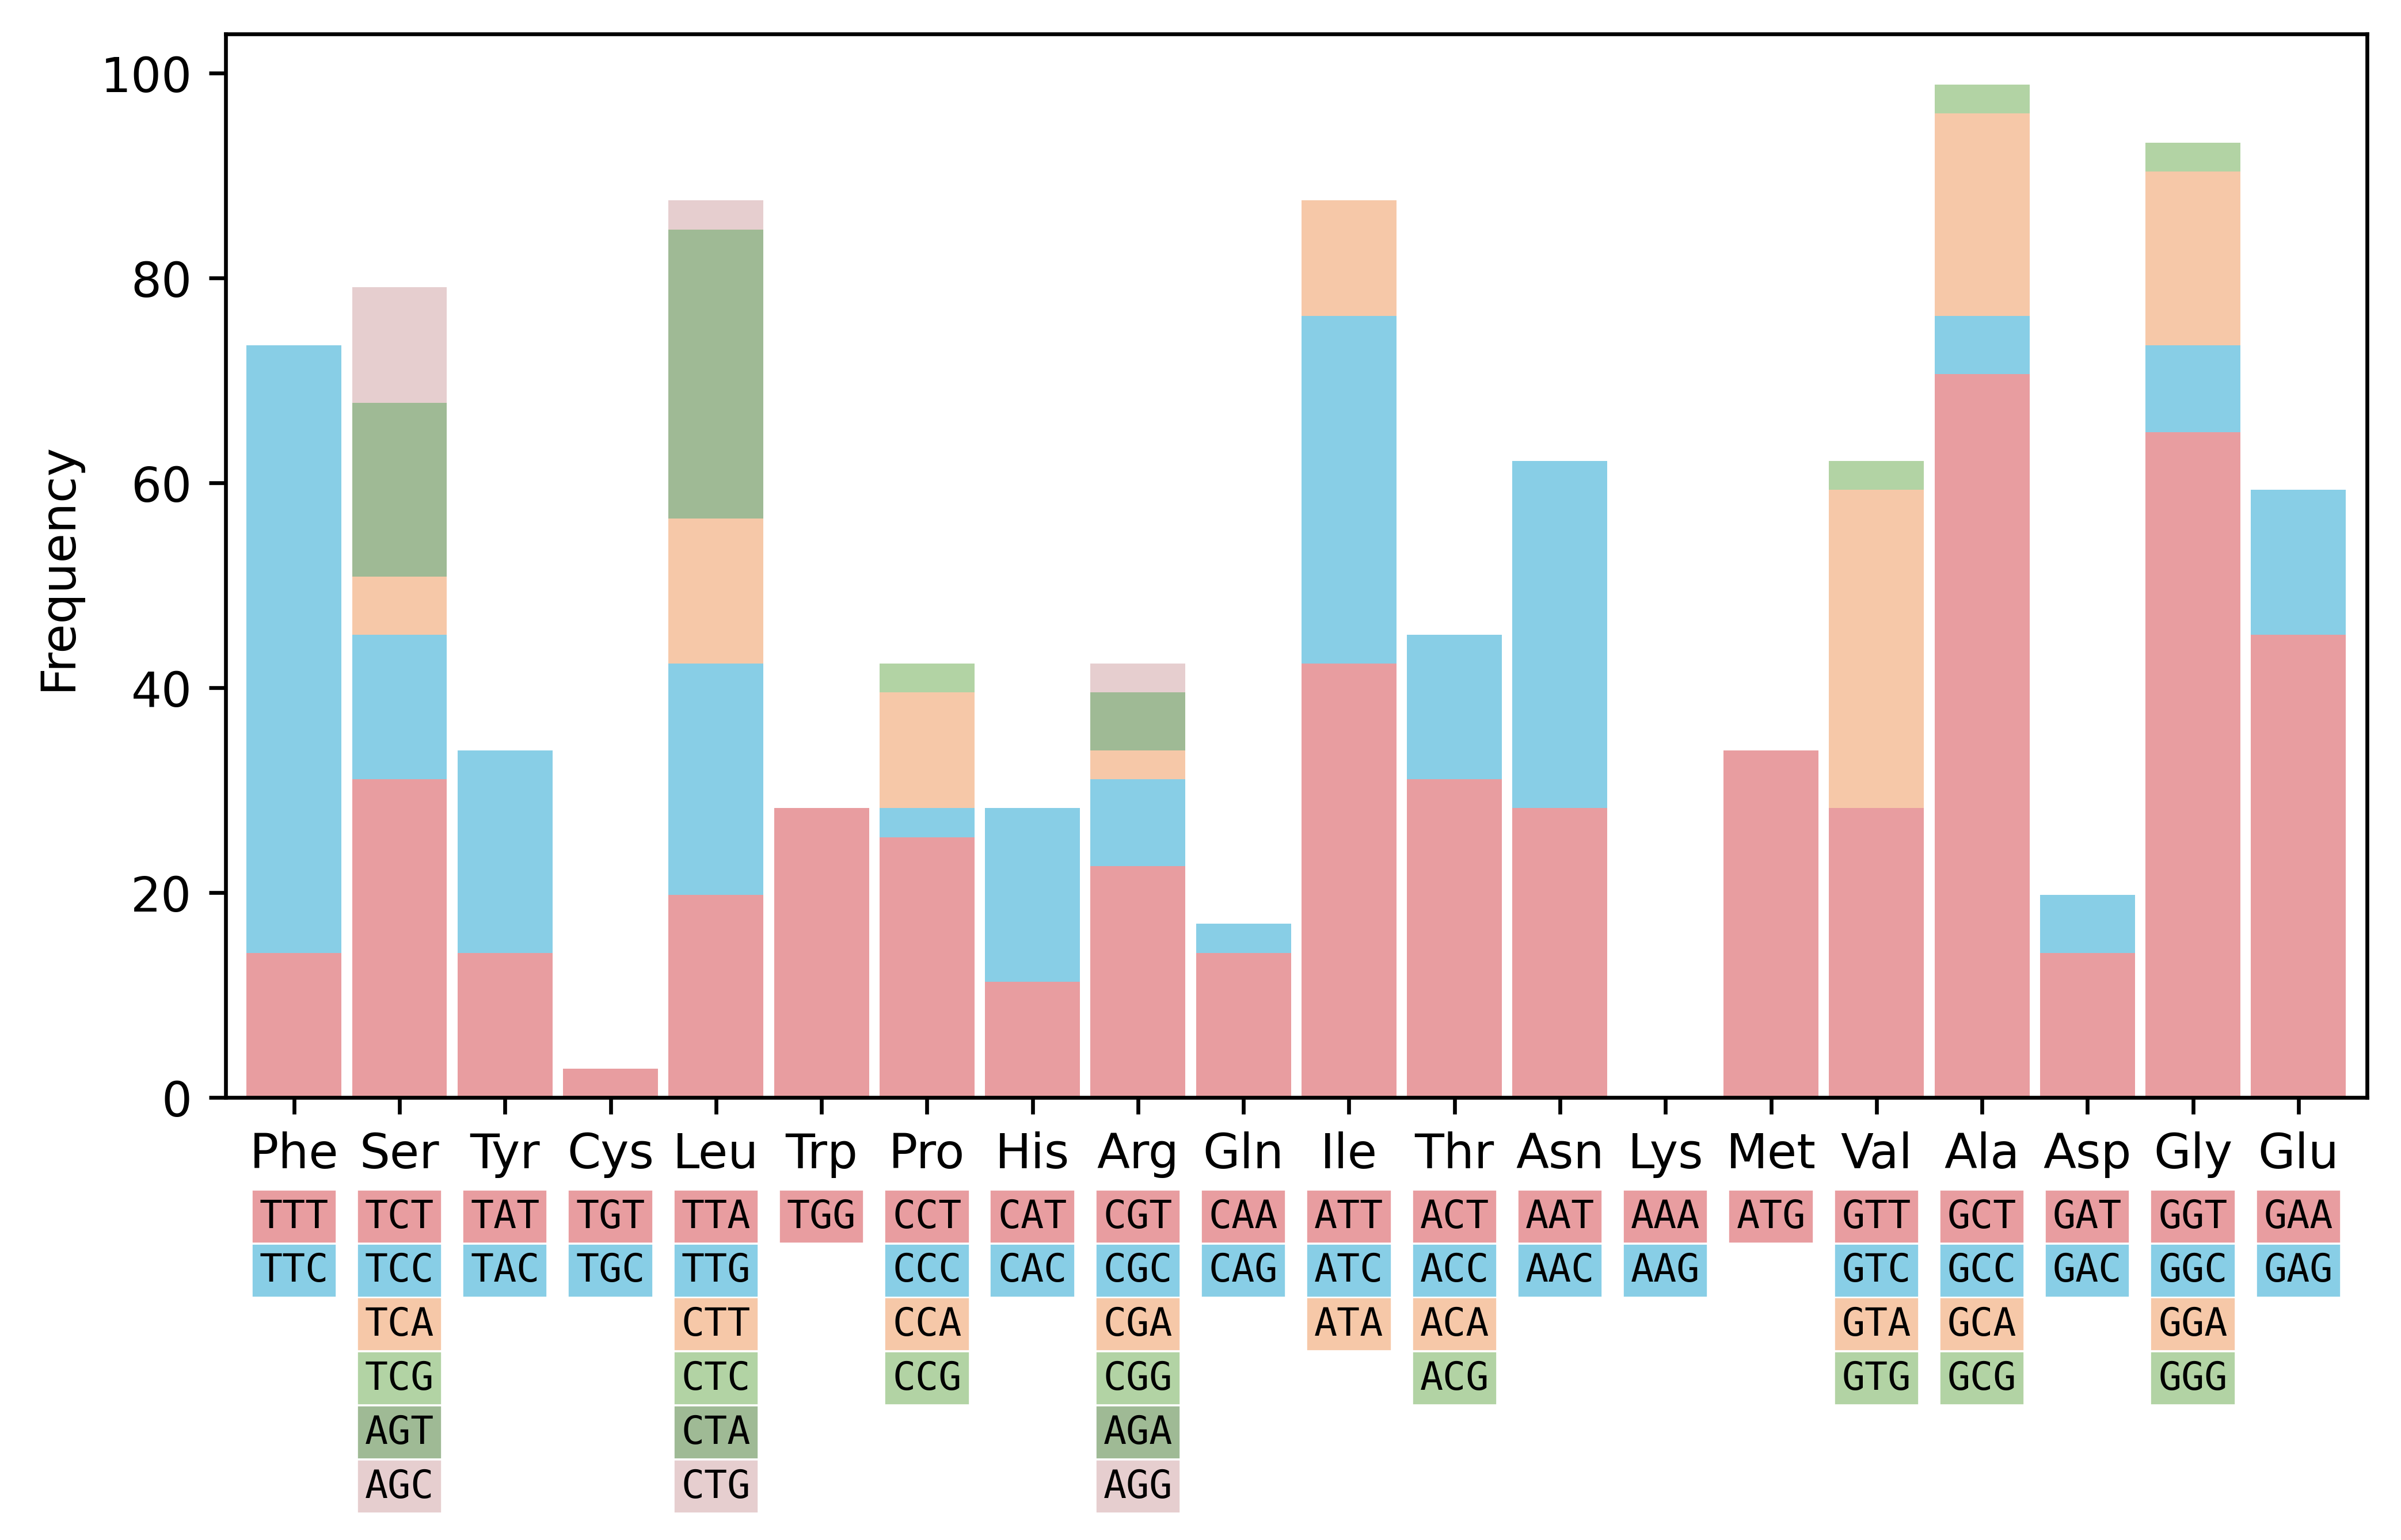

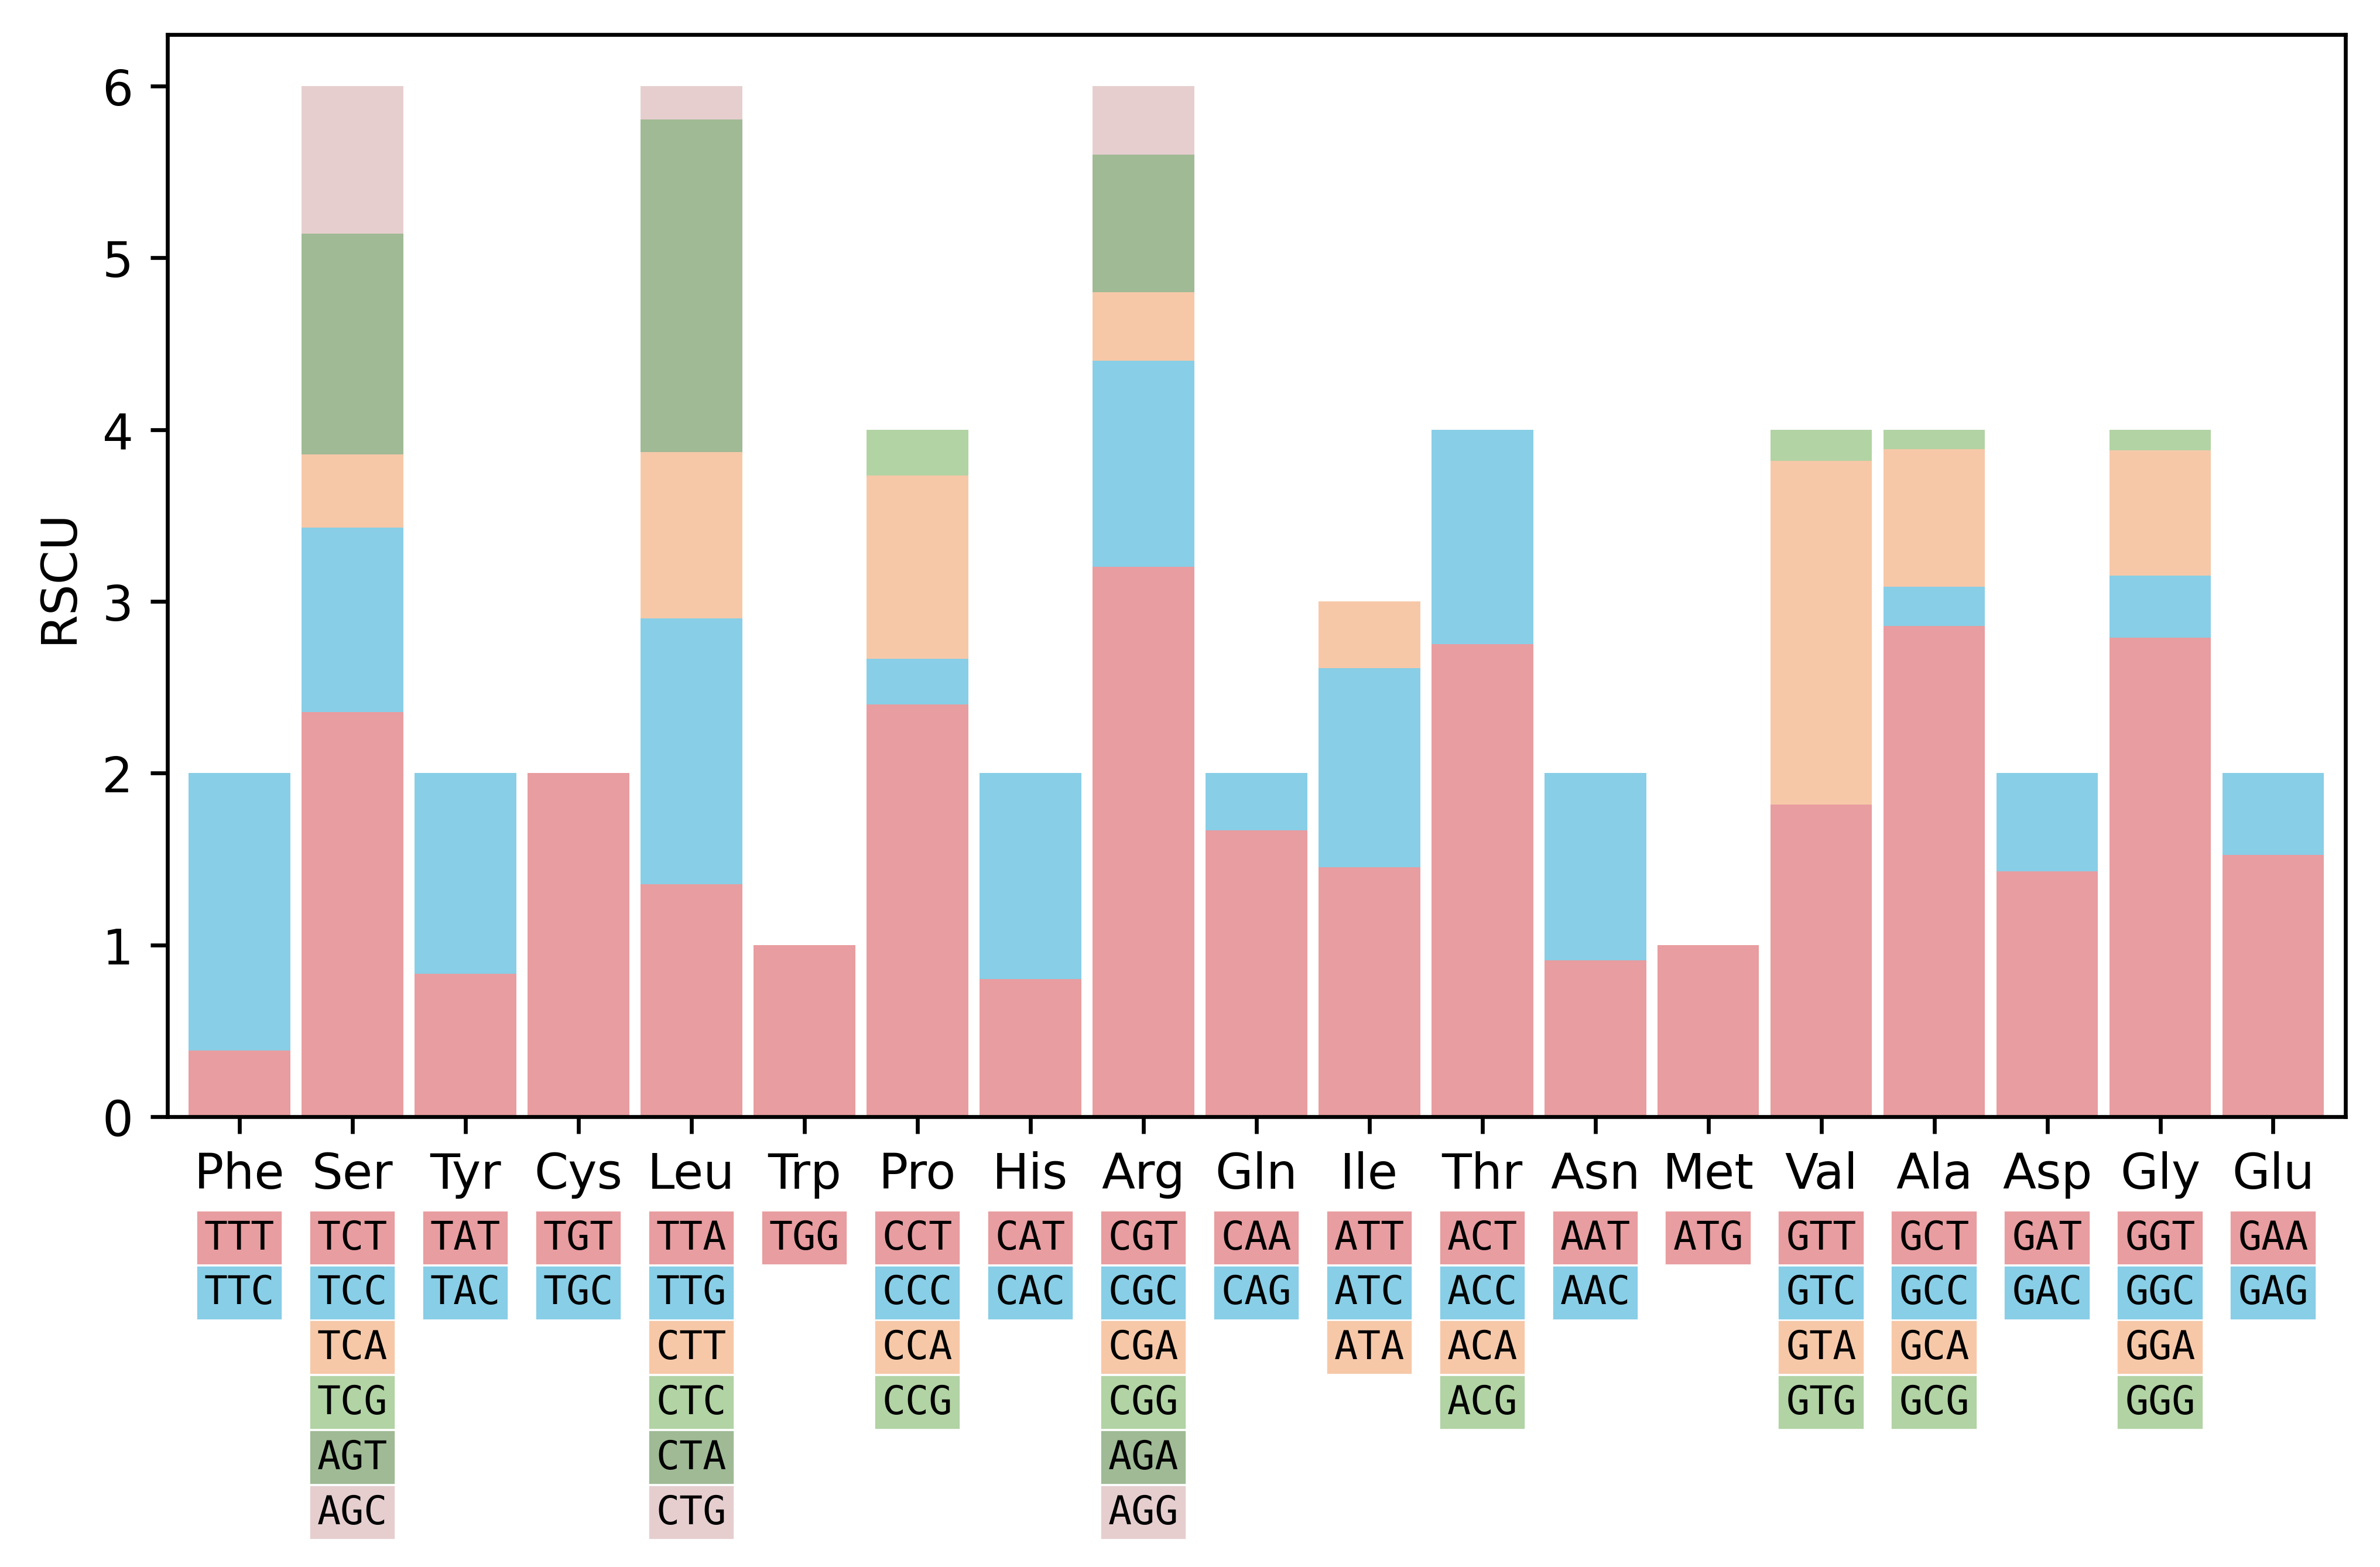

In [29]:
# example4: compute Obs, Franction, Frequency, RSCU
GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("input seqence:\n")
print(">"+GeneName+"\n", Seqence, sep="")

# Calculate
Obs = pycubcore.GetObs(seqences=Seqence, genetic_codes=1) #The seqences parameter can be a string of gene sequence or a list. For example, a list of all CDS sequences of a chloroplast, so as to calculate the Obs in the whole organism
Franction=pycubcore.GetFranction(Obs)
Frequency=pycubcore.GetFrequency(Obs)
RSCU=pycubcore.GetRSCU(Obs)

# Visualization
print("\nVisualization result：\n")
pycubcore.DrawCodonBarplot(Obs, ylabel="Number")
pycubcore.DrawCodonBarplot(Franction, ylabel="Franction")
pycubcore.DrawCodonBarplot(Frequency, ylabel="Frequency")
pycubcore.DrawCodonBarplot(RSCU, ylabel="RSCU")

In [28]:
# example5: Get similar results to Cusp software
# Cusp website: https://www.bioinformatics.nl/cgi-bin/emboss/cusp

GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("Input seqence: \n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubcore.GetObs(seqences=Seqence, genetic_codes=1) 
print("Cusp result: \n")
print(pycubcore.GetCusp(Obs, human_format=True)) #human_format=True, Human-readable output, otherwise machine-readable.

Input seqence: 

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCT

In [27]:
# example6: Get similar results to codonW software.
GeneName, Seqence = next(fastaio.FastaIO(inputfile))
print("Input seqence: \n")
print(">"+GeneName+"\n", Seqence, sep="")
print("\n")

Obs = pycubcore.GetObs(seqences=Seqence, genetic_codes=16)
print("codonW result: \n")
print(pycubcore.GetcodonW(Obs, human_format=True)) #human_format=True, Human-readable output, otherwise machine-readable.

Input seqence: 

>psbA
ATGACTGCAATTTTAGAGAGACGCGAAAGCGAAAGCCTATGGGGTCGCTTCTGTAACTGGATAACCAGCACTGAGAACCGTCTTTACATTGGATGGTTTGGTGTTTTGATGATCCCTACCTTATTGACCGCAACTTCTGTATTTATTATCGCCTTCATTGCTGCTCCTCCAGTAGATATTGATGGTATTCGTGAACCTGTTTCTGGGTCTCTACTTTACGGAAACAATATTATCTCTGGTGCCATTATTCCTACTTCTGCAGCTATAGGATTGCACTTTTACCCGATATGGGAAGCGGCATCCGTTGATGAATGGTTATACAATGGTGGTCCTTATGAATTGATTGTTCTACACTTCTTACTTGGTGTAGCTTCTTACATGGGTCGTGAGTGGGAACTAAGTTTCCGTCTGGGTATGCGCCCTTGGATTGCTGTTGCATATTCAGCTCCTGTTGCAGCTGCAACTGCTGTTTTCTTGATCTACCCAATCGGTCAAGGAAGCTTCTCTGATGGTATGCCCCTAGGAATCTCTGGTACTTTCAACTTCATGATTGTATTCCAGGCTGAGCACAACATTCTTATGCACCCATTTCACATGTTAGGTGTGGCTGGTGTATTCGGCGGCTCCCTATTCAGTGCTATGCATGGTTCCTTGGTAACTTCAAGTTTGATCAGGGAAACCACTGAAAATGAATCTGCTAATGAAGGTTACAGATTCGGTCAAGAGGAAGAAACTTATAATATCGTAGCTGCTCATGGTTATTTTGGCCGATTGATCTTCCAATATGCTAGTTTCAACAATTCTCGTTCTTTACATTTCTTCCTAGCTGCTTGGCCTGTAGTAGGTATCTGGTTCACTGCTTTAGGTATTAGTACCATGGCTTTCAACCTAAATGGTTTCAATTTCAACCAATCCGTAGTTGACAGTCAAGGTCGTGTAATTAACACTTGGGCTGATATCATCAACCGTGCTAACCT